# Running a Random Forest Regression Model to interpolate River Width throughout a River Channel

In [1]:
# File and Data Manipulation
import os                       # interacting with the operating system

# Data Analysis
import numpy as np              # numerical operations
import pandas as pd             # data manipulation and analysis
import seaborn as sns           # Statistics and Quick Visualizations

# Data Visualization
import matplotlib.pyplot as plt       # creating static, interactive, and animated visualizations
plt.style.use("default")              # Set the default style matplotlib plots
from matplotlib.ticker import MaxNLocator     # control the maximum number of ticks on plots
from matplotlib.ticker import MultipleLocator # control tick intervals on plots
from matplotlib.ticker import AutoMinorLocator # Automate the minor tick intervals on plots

import matplotlib.ticker as mticker           # advanced tick formatting and placement

# Suppress Warnings
import warnings                 # handling warnings
warnings.filterwarnings("ignore") # Suppress all warnings

# Display 
from IPython.core.display import display, HTML # Display object/HTML in a rich format
#display(HTML("<style>.container { width:100% !important; }</style>")) # increases width of cells

# Data Preprocessing
from sklearn.preprocessing import StandardScaler      # Standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import OneHotEncoder       # Encoding categorical features as a one-hot numeric array

# Model Selection and Validation
from sklearn.model_selection import train_test_split  # Splitting datasets into random train and test subsets
from sklearn.model_selection import cross_val_score   # Evaluate a score by cross-validation
from sklearn.model_selection import KFold             # K-Folds cross-validator providing train/test indices to split data

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor    # A random forest regressor.

# Pipeline
from sklearn.pipeline import make_pipeline            # Construct a Pipeline from the given estimators

# Model Evaluation Metrics
from sklearn.metrics import r2_score                  # R^2 (coefficient of determination) regression score function
from sklearn.metrics import mean_squared_error        # Mean squared error regression loss
from sklearn.metrics import mean_absolute_error       # Mean absolute error regression loss

# Model Inspection
from sklearn.inspection import permutation_importance # Permutation importance for feature evaluation

# Change Directory
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data') # Laptop @ J: # Desktop @ J:
print('-----------------------------------------------------')
print('WD: ', os.getcwd())
print('-----------------------------------------------------')

# Import Water Data (Amon_2016_Yenisei)
waterfile = 'Amon_2016_Yenisei_Water.txt'
water = pd.read_csv(waterfile, sep ='\t',  parse_dates=[0])
water.columns = water.columns.str.strip()
water.index = water['date_time']
water['year'] = pd.DatetimeIndex(water['date_time']).year
water['month'] = pd.DatetimeIndex(water['date_time']).month
water['day'] = pd.DatetimeIndex(water['date_time']).day
water['hour'] = pd.DatetimeIndex(water['date_time']).hour
water = water.sort_values(by = ['year','month', 'day', 'hour'], ascending=True) 
water = water.dropna(how='any')

# Import Air Data (Amon_2016_Yenisei)
airfile = 'Amon_2016_Yenisei_Air.txt'
air = pd.read_csv(airfile, sep ='\t',  parse_dates=[0])
air.columns = air.columns.str.strip()
air.index = air['date_time']
air['year'] = pd.DatetimeIndex(air['date_time']).year
air['month'] = pd.DatetimeIndex(air['date_time']).month
air['day'] = pd.DatetimeIndex(air['date_time']).day
air['hour'] = pd.DatetimeIndex(air['date_time']).hour
air = air.sort_values(by = ['year','month', 'day', 'hour'], ascending=True) 
air = air.dropna(how='any')

# Move Anomalies to a new dataframe
water_anomalies_co2_w = water[water['co2_w'] > 1200]
water_anomalies_ico2_w = water[water['ico2_w'] >= -10]
water_anomalies_ch4_w = water[water['ch4_w'] > 500]

air_anomalies_ico2_a = air[air['ico2_a'] <= -12]
air_anomalies_co2_a1 = air[air['co2_a'] > 550]
air_anomalies_co2_a2 = air[air['co2_a'] < 350]
air_anomalies_ch4_a = air[air['ch4_a'] < 1.6]

# Concatenate all the anomalies into a single dataframe
water_anomalies = pd.concat([water_anomalies_co2_w, water_anomalies_ico2_w, 
                             water_anomalies_ch4_w], axis=0)

air_anomalies = pd.concat([air_anomalies_ico2_a, air_anomalies_co2_a1, 
                           air_anomalies_co2_a2,air_anomalies_ch4_a], axis=0)

# Remove Anomalies from Origional Dataframe
water = water[~water.index.isin(water_anomalies_co2_w.index)]
water = water[~water.index.isin(water_anomalies_ico2_w.index)]
water = water[~water.index.isin(water_anomalies_ch4_w.index)]
air = air[~air.index.isin(air_anomalies_ico2_a.index)]
air = air[~air.index.isin(air_anomalies_co2_a1.index)]
air = air[~air.index.isin(air_anomalies_co2_a2.index)]
air = air[~air.index.isin(air_anomalies_ch4_a.index)]

water = water.rename(columns={'lat_w': 'lat', 'lon_w': 'lon'})
air = air.rename(columns={'lat_a': 'lat', 'lon_a': 'lon'})

#asd = asd[['lat', 'lon']].copy()

# Geospatial Data Handling
import geopandas as gpd         # working with geospatial data
from shapely.geometry import LineString, Point, Polygon
import rasterio                       # core library
from rasterio.plot import show        # for displaying raster images
# Directory for Vector/Raster Data
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Maps_Siberia_Data')
# Yenisey Watershed
AGRO_Watershed = gpd.read_file('ArcticGRO_Yenisei_watershed')
# River Width (MERIT_Hydro)
hydro = 'MERIT_Hydro_River_Width_Yenisey.tif'

# Folder to Save Images (# Laptop @ J: ##### Desktop @ J:)
#os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data\Chomiak_RF_Yenisey')

-----------------------------------------------------
WD:  J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data
-----------------------------------------------------


In [2]:
asdasd = water[['lat', 'lon']].copy()
sdfsdf = air[['lat', 'lon']].copy()

qwe = pd.concat([asdasd, sdfsdf], axis=0)
qwe = qwe.sort_values(by='lat')

In [3]:
# Remove Some Mo
water_anomalies_lwr_w = water[water['lwr_w'] < 271.5696741]
# Remove Anomalies from Origional Dataframe
water = water[~water.index.isin(water_anomalies_lwr_w.index)]

# Remove Some Mo
air_anomalies_lwr_a = air[air['lwr_a'] < 271.5696741]
# Remove Anomalies from Origional Dataframe
air = air[~air.index.isin(air_anomalies_lwr_a.index)]


In [4]:
asdasd = water[['lat', 'lon']].copy()
sdfsdf = air[['lat', 'lon']].copy()

asd = pd.concat([asdasd, sdfsdf], axis=0)
asd = asd.sort_values(by='lat')

In [5]:
# Load the river width raster
with rasterio.open(hydro) as src:
    affine = src.transform
    river_width_array = src.read(1)
    river_width_array[river_width_array == src.nodata] = np.nan  # Handle NoData values

# Function to get river width at a given location
def get_river_width(lat, lon, src, array):
    row, col = src.index(lon, lat)
    return array[row, col]

# Apply the function to each row in the Water Data
asd['River_Width'] = asd.apply(lambda row: get_river_width(row['lat'], row['lon'], 
                                                           src, river_width_array), axis=1)

In [6]:
asd = asd.dropna()

In [7]:
# Model Training and Prediction, Performance Evaluation, and Cross-Validation
def train_evaluate_rf(X, y, test_size=0.20, n_estimators=100, cv_folds=5, random_state=42):
    """
    This function performs several key steps in model training and evaluation:
    1. Splits the dataset into training and testing sets.
    2. Trains a Random Forest regressor on the training set.
    3. Evaluates the trained model on the test set using Mean Absolute Error (MAE).
    4. Conducts k-fold cross-validation to assess the model's performance and consistency across different subsets of the dataset.
    5. Prints out the MAE from the initial test set evaluation, statistical summary of the residuals (to assess model's prediction errors), and the average and standard deviation of MAE from the cross-validation.

    Parameters:
    X: Predictor variables.
    y: Target variable.
    test_size (float, optional): Proportion of the dataset to include in the test split. Default is 0.20.
    n_estimators (int, optional): Number of trees in the forest. Default is 100.
    cv_folds (int, optional): Number of folds for k-fold cross-validation. Default is 5.
    random_state (int, optional): Controls the randomness of the training and testing splits. Default is 42.

    Returns:
    dict: A dictionary containing the model, MAE, residuals, and cross-validation results.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)
    
    # Train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    
    # Calculate the residuals and MAE
    residuals = y_test - y_pred
    mae = mean_absolute_error(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv_folds, 
                                scoring='neg_mean_absolute_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Printing the results
    print("Model Performance")
    print("Mean Absolute Error (MAE):", mae)
    print("\nResidual Analysis")
    print("Mean of Residuals:", np.mean(residuals))
    print("Standard Deviation of Residuals:", np.std(residuals))
    print("\nCross-Validation Results")
    print(f"Average MAE over {cv_folds} folds: {mean_cv_score:.3f}")
    print(f"Standard Deviation over {cv_folds} folds: {std_cv_score:.3f}")

    # Return results in a dictionary
    return {
        'model': rf_model,
        'MAE': mae,
        'residuals': residuals,
        'CV_Mean_MAE': mean_cv_score,
        'CV_Std_MAE': std_cv_score, 
        'y_test': y_test,
        'X_test': X_test
    }

# Random State: 
# Controls the randomness of the bootstrapping of the samples for building trees (if `bootstrap=True`)
# and the sampling of the features to consider when looking for the best split at each node. 
# Default is 42.


def plot_model_results(results, title):
    """
    Plots the model performance results including Observed vs Predicted values and Residuals vs Fitted values.

    Parameters:
    results (dict): Dictionary containing model results as returned by train_evaluate_rf.
    """
    y_test = results['y_test']
    y_pred = results['model'].predict(results['X_test'])
    residuals = results['residuals']
    mae = results['MAE']
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)
    mean_cv_score = results['CV_Mean_MAE']
    std_cv_score = results['CV_Std_MAE']

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Observed vs Predicted
    ax[0].scatter(y_test, y_pred, c='r', ec='black', zorder=2)
    ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, zorder=1)
    ax[0].set_xlabel('Observed', labelpad=15, fontsize=18)
    ax[0].set_ylabel('Predicted', labelpad=15, fontsize=18)
    ax[0].set_title('Observed vs Predicted', fontsize=24)
    
    # Residual lines
    for i, j in zip(y_test, y_pred):
        ax[0].plot([i, i], [i, j], color='red', lw=1, zorder=0)

    # Plot 2: Residuals vs Fitted Values
    ax[1].scatter(residuals, y_pred, c='r', ec='black', zorder=2)
    ax[1].axvline(0, color='k', linestyle='--', lw=2, zorder=1)
    ax[1].set_xlabel('Residuals', labelpad=15, fontsize=18)
    ax[1].set_title('Fitted Values vs Residuals', fontsize=24)

    # Adding lines for residuals in the Residuals vs Fitted Values plot
    for pred, resid in zip(y_pred, residuals):
        ax[1].plot([resid, 0], [pred, pred], color='red', lw=0.5, zorder=0)

    #ax[0].text(0.15, 0.92, f"MAE = {mae:.2f}", fontsize=18, color='black', 
               #horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
    ax[0].text(0.25, 0.92, f"MAE = {mean_cv_score:.2f} ± {std_cv_score:.3f}", fontsize=18, color='black', 
               horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
    
    ax[1].text(0.15, 0.92, f"μ = {mean_residuals:.3f}", fontsize=18, color='black', 
               horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)
    ax[1].text(0.15, 0.85, f"σ = {std_residuals:.3f}", fontsize=18, color='black', 
               horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

    for ax in ax.flat:
        ax.xaxis.set_major_locator(MaxNLocator(6))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
        ax.xaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)
        ax.yaxis.set_major_locator(MaxNLocator(6))
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16, width=2)
        ax.yaxis.set_tick_params(which='minor', direction='inout', length=6, labelsize=16)

    fig.tight_layout(pad=1)
    plt.suptitle(title, fontsize=28, c='black', x=0.535, y=1.045)
    plt.show()
    
    return fig


def calculate_permutation_importance(X, y, n_estimators=100, cv_folds=5, n_repeats=10, random_state=42):
    """
    Calculates the permutation importance of features using a Random Forest model and k-fold cross-validation.

    Parameters:
    X (pd.DataFrame): DataFrame containing the predictor variables.
    y (pd.Series): Series containing the target variable.
    n_estimators (int, optional): The number of trees in the forest. Default is 100.
    cv_folds (int, optional): Number of folds for k-fold cross-validation. Default is 5.
    n_repeats (int, optional): Number of times to permute a feature. Default is 10.
    random_state (int, optional): Controls the randomness of the model training and feature permutation. Default is 42.

    Returns:
    pd.DataFrame: A DataFrame containing the features and their corresponding permutation importance, sorted in descending order.
    """
    # Initialize the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Initialize KFold cross-validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    perm_importances = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        rf_model.fit(X_train_fold, y_train_fold)
        
        # Perform permutation importance
        results = permutation_importance(rf_model, X_test_fold, y_test_fold, n_repeats=n_repeats, random_state=random_state)

        # Store the importances
        perm_importances.append(results.importances_mean)

    # Calculate the average importances across all folds
    average_perm_importances = np.mean(perm_importances, axis=0)

    # Create a DataFrame to view the feature importances
    feature_importances_df = pd.DataFrame({'feature': X.columns, 'permutation_importance': average_perm_importances})

    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='permutation_importance', ascending=False)

    return feature_importances_df

In [8]:
asd.shape

(6418, 3)

In [9]:
asd

,lat,lon,River_Width
date_time,,,
2016-07-23 13:08:00,56.239426,93.417639,683.582764
2016-07-23 13:10:00,56.244664,93.412591,624.931702
2016-07-23 13:11:00,56.247253,93.409582,624.931702
2016-07-23 13:12:00,56.249884,93.406776,613.929443
2016-07-23 13:13:00,56.252675,93.404479,663.199219
...,...,...,...
2016-08-03 16:47:00,68.259303,86.606277,1722.275757
2016-08-03 16:48:00,68.259451,86.606294,1722.275757
2016-08-03 16:49:00,68.259631,86.606331,1722.275757


In [10]:
# Target Variable
y = asd['River_Width']

# Predictor Variables
X = asd[['lat', 'lon']]

# Rename columns to remove the '_w'
#X.columns = [col.replace('_w', '') for col in X.columns]

# Run the Model
results = train_evaluate_rf(X, y)

Model Performance
Mean Absolute Error (MAE): 56.8652777790949

Residual Analysis
Mean of Residuals: 5.308884317302999
Standard Deviation of Residuals: 161.68889784833493

Cross-Validation Results
Average MAE over 5 folds: 63.189
Standard Deviation over 5 folds: 2.612


In [11]:
# Extract the trained model
trained_rf_model = results['model']

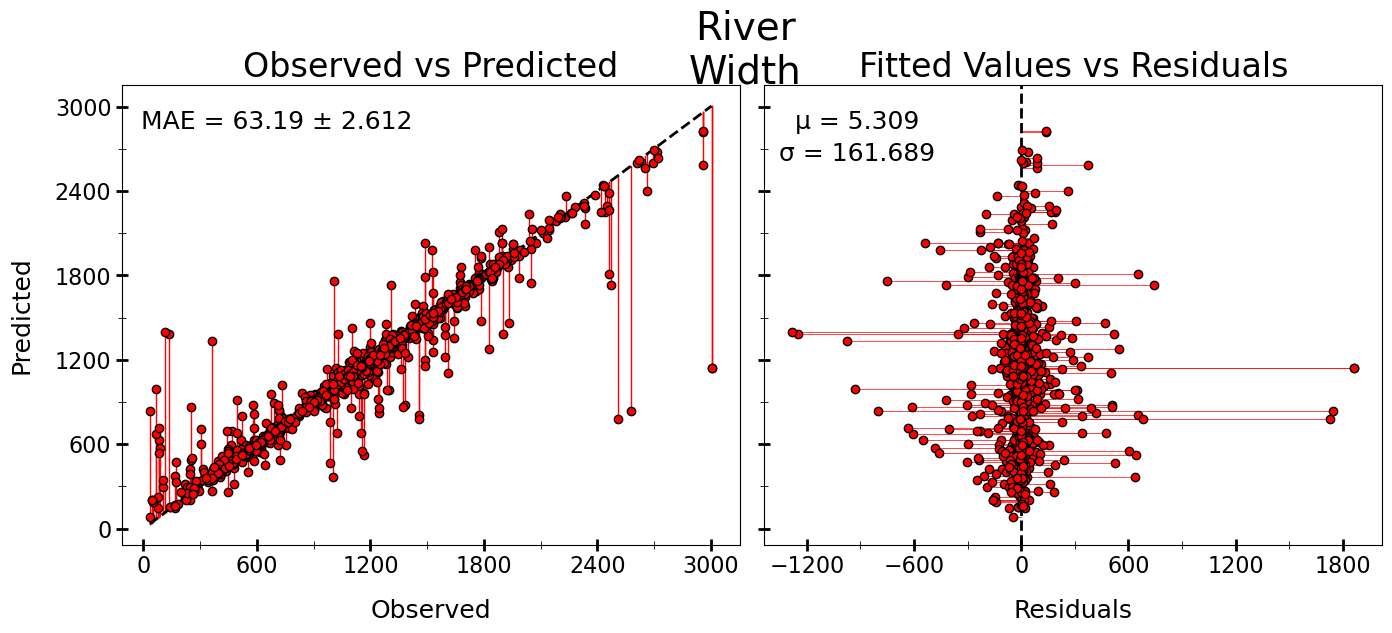

In [12]:
# Plot the Results
fig = plot_model_results(results, 'River\nWidth')

# Folder to Save Images
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data\Chomiak_RF_Yenisey')
fig.savefig('River_Width_Random_Forest.png', dpi = 600, bbox_inches='tight')

In [13]:
# Run the Model to determine feature importance
feature_importances = calculate_permutation_importance(X, y)
print(feature_importances)

  feature  permutation_importance
0     lat                1.038624
1     lon                0.910378


In [14]:
# Predict river width for the new data
predicted_river_width = trained_rf_model.predict(qwe)

In [15]:
predicted_river_width

array([ 650.7960434 ,  638.34248474,  625.27420929, ..., 1722.27575684,
       1722.27575684, 1697.67579834])

In [16]:
qwe['predicted_river_width'] = predicted_river_width

In [17]:
qwe.to_csv('qwe.csv')

In [18]:
os.getcwd()

'J:\\Chomiak_Python\\Chomiak_Notebooks\\Siberia_Data\\Chomiak_RF_Yenisey'

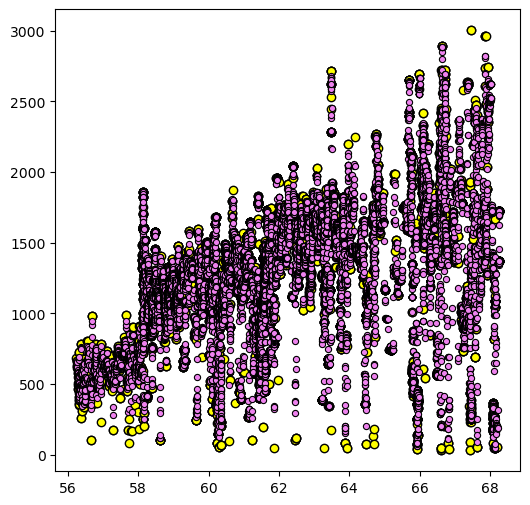

In [19]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(asd['lat'], asd['River_Width'], c='yellow', ec='k')
ax.scatter(qwe['lat'], qwe['predicted_river_width'], c='violet', ec='k', s=20, lw=0.8)

In [20]:
qwe

,lat,lon,predicted_river_width
date_time,,,
2016-07-23 13:08:00,56.239426,93.417639,650.796043
2016-07-23 13:09:00,56.242082,93.415391,638.342485
2016-07-23 13:10:00,56.244664,93.412591,625.274209
2016-07-23 13:11:00,56.247253,93.409582,621.614744
2016-07-23 13:12:00,56.249884,93.406776,619.009461
...,...,...,...
2016-08-03 16:55:00,68.259881,86.609551,1697.675798
2016-08-03 16:51:00,68.259969,86.606485,1722.275757
2016-08-03 16:52:00,68.260151,86.606599,1722.275757


In [21]:
print(asd.shape)
print(qwe.shape)
# Merge df1 and df2 on their indices
merged_df = pd.merge(asd, qwe, left_index=True, right_index=True)
print(merged_df.shape)
merged_df

(6418, 3)
(15027, 3)
(6418, 6)


,lat_x,lon_x,River_Width,lat_y,lon_y,predicted_river_width
date_time,,,,,,
2016-07-23 13:08:00,56.239426,93.417639,683.582764,56.239426,93.417639,650.796043
2016-07-23 13:10:00,56.244664,93.412591,624.931702,56.244664,93.412591,625.274209
2016-07-23 13:11:00,56.247253,93.409582,624.931702,56.247253,93.409582,621.614744
2016-07-23 13:12:00,56.249884,93.406776,613.929443,56.249884,93.406776,619.009461
2016-07-23 13:13:00,56.252675,93.404479,663.199219,56.252675,93.404479,652.524381
...,...,...,...,...,...,...
2016-08-03 16:47:00,68.259303,86.606277,1722.275757,68.259303,86.606277,1722.275757
2016-08-03 16:48:00,68.259451,86.606294,1722.275757,68.259451,86.606294,1722.275757
2016-08-03 16:49:00,68.259631,86.606331,1722.275757,68.259631,86.606331,1722.275757


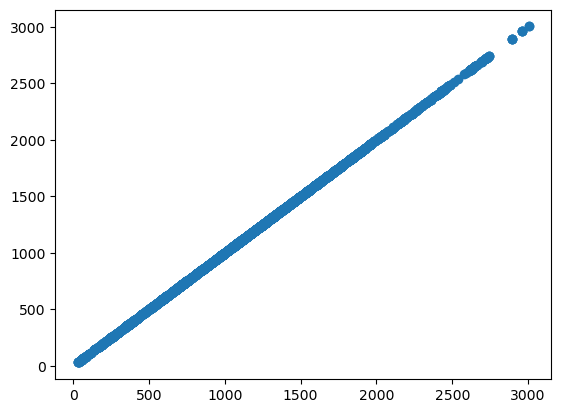

In [22]:
plt.scatter(merged_df['River_Width'], merged_df['River_Width'])